<a href="https://colab.research.google.com/github/atalianb/BeePy2.0/blob/main/Galaxias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import scipy
import matplotlib.style as style
style.use('seaborn-colorblind')

In [2]:
data_path = '/content/drive/MyDrive/data_LBSG/'

In [3]:
U11454=np.loadtxt(data_path+'U11454.dat')

In [4]:
vecRp = np.array([row[1] for row in U11454])# galactocentric distance [kpc]
vecvRp = np.array([row[5] for row in U11454])# rotation velocity [km/s]
vecerrvRp = np.array([row[6] for row in U11454])# error in rotation velocity [km/s]

Text(0.5, 1.0, 'U11454')

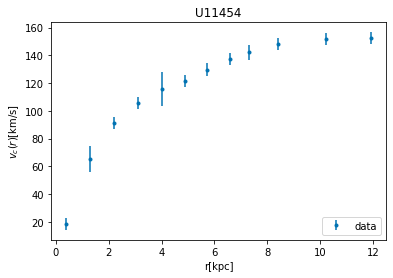

In [5]:
plt.errorbar(vecRp,vecvRp,yerr=vecerrvRp,fmt='.',label='data')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")
plt.legend(loc='lower right')
plt.title('U11454')

$v_{c}^{2}(r) = 4\pi G\rho_{0}r_{0}^{2}\left[\frac{1}{r}\ln{(1+\frac{r}{r_{0}})} - \frac{1}{\frac{r}{r_{0}}+1} \right]$

In [6]:
def NFW(theta,r=vecRp):
    R_0, c_NFW = theta
    return (c_NFW) * np.sqrt((1/r)*(np.log(1 + (r/R_0)) - ((r/R_0)/(1+(r/R_0)))))
truths = (19.0125064 , 1720.97164712) #from curve fit 

In [7]:
def lnlike(theta, x, y, yerr):
    return -0.5 * np.sum(((y - NFW(theta, x))/yerr) ** 2)

In [8]:
def lnprior(theta):
    R_0, c_NFW = theta
    if 0.0 < R_0 < 50 and 0.0 < c_NFW < 5000: 
        return 0.0
    return -np.inf

In [9]:
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [10]:
data = (vecRp,vecvRp,vecerrvRp)
nwalkers = 300
niter = 5000
initial = np.array([19.0125064 , 1720.97164712])
ndim = len(initial)
p0 = [np.array(initial) + 10 * np.random.randn(ndim) for i in range(nwalkers)]

In [11]:
! pip install -U emcee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
import emcee

In [13]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

In [14]:
sampler.run_mcmc(p0, 100)

/usr/local/lib/python3.7/dist-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]


State([[  18.15036354 1689.19124929]
 [  18.41668177 1696.99003512]
 [  22.34196742 1962.52045166]
 [  26.45385799 2290.58600504]
 [  25.80294685 2198.02502699]
 [  15.75500515 1498.3215683 ]
 [  16.67901635 1553.65957103]
 [  23.85547717 2059.02398298]
 [  24.34242005 2084.93680703]
 [  24.96685421 2184.89165451]
 [  20.8966034  1854.90033282]
 [  18.77036781 1699.47806518]
 [  24.09918151 2081.7866849 ]
 [  26.25130825 2293.86042175]
 [  22.91662835 1982.05239999]
 [  21.74332968 1937.31260289]
 [  24.30957075 2159.04305539]
 [  24.55009166 2128.01283618]
 [  24.92189169 2188.83599367]
 [  23.05225533 2022.42981829]
 [  20.40241412 1819.93678618]
 [  17.65806758 1618.84105959]
 [  23.66836877 2029.8043076 ]
 [  16.11850759 1479.84140881]
 [  19.9166035  1800.83259749]
 [  17.53285853 1613.04487606]
 [  15.77142161 1470.28641325]
 [  21.4857998  1914.3617691 ]
 [  15.70460315 1484.89067461]
 [  20.57717501 1855.2521101 ]
 [  19.89688634 1763.94329343]
 [  28.4904614  2449.6648467 ]
 [

In [23]:
samples = sampler.chain[:, 1500:, :].reshape((-1, ndim))#1500:Burning

In [24]:
samples = sampler.flatchain
samples[np.argmax(sampler.flatlnprobability)]

array([  19.01271131, 1721.0562781 ])

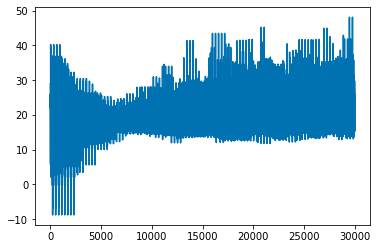

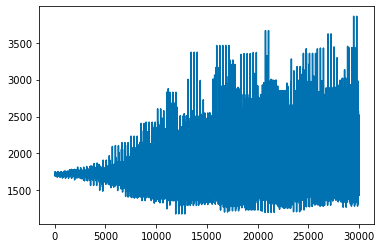

In [25]:
plt.figure()
plt.plot(sampler.flatchain[:,0]);
plt.figure()
plt.plot(sampler.flatchain[:,1]);

In [26]:
! python -m pip install corner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
import corner

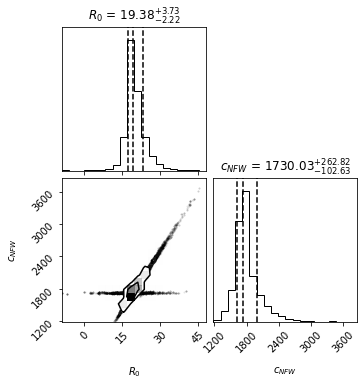

In [28]:
fig = corner.corner(samples, labels=["$R_0$", "$c_{NFW}$"],
                     quantiles=[0.16, 0.5, 0.84],
    show_titles=True,title_kwargs={"fontsize": 12})

Nota: juega con el burning y ve que pasa con la triangleplot

In [21]:
samples[np.argmax(sampler.flatlnprobability)]

array([  19.01271131, 1721.0562781 ])

Text(0.5, 1.0, 'U11454')

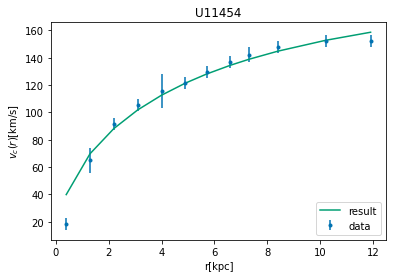

In [22]:
plt.errorbar(vecRp,vecvRp,yerr=vecerrvRp,fmt='.',label='data')
plt.plot(vecRp,NFW(samples[np.argmax(sampler.flatlnprobability)]),label='result')
plt.ylabel(r'$v_{c}(r)$[km/s]')
plt.xlabel("r[kpc]")
plt.legend(loc='lower right')
plt.title('U11454')